In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 301)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data_path = "cardata.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [5]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df['Age'] = np.abs(df['Year'] - max(df['Year']))
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,4
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,3
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,3
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,2
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,3


In [8]:
target = df['Selling_Price'].iloc[:151]
x1 = df['Car_Name'].iloc[:151]

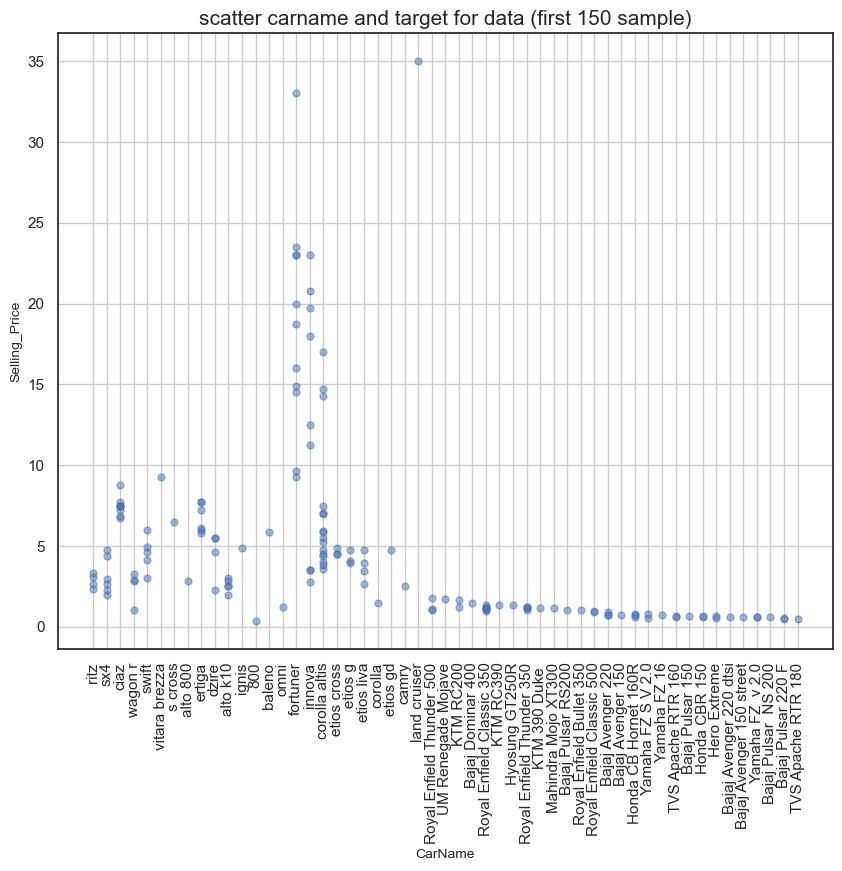

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(x1, target, s=25, alpha=.5)
plt.title('scatter carname and target for data (first 150 sample)', fontsize=15)
plt.xlabel("CarName", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [10]:
target1 = df['Selling_Price'].iloc[151:]
x12 = df['Car_Name'].iloc[151:]

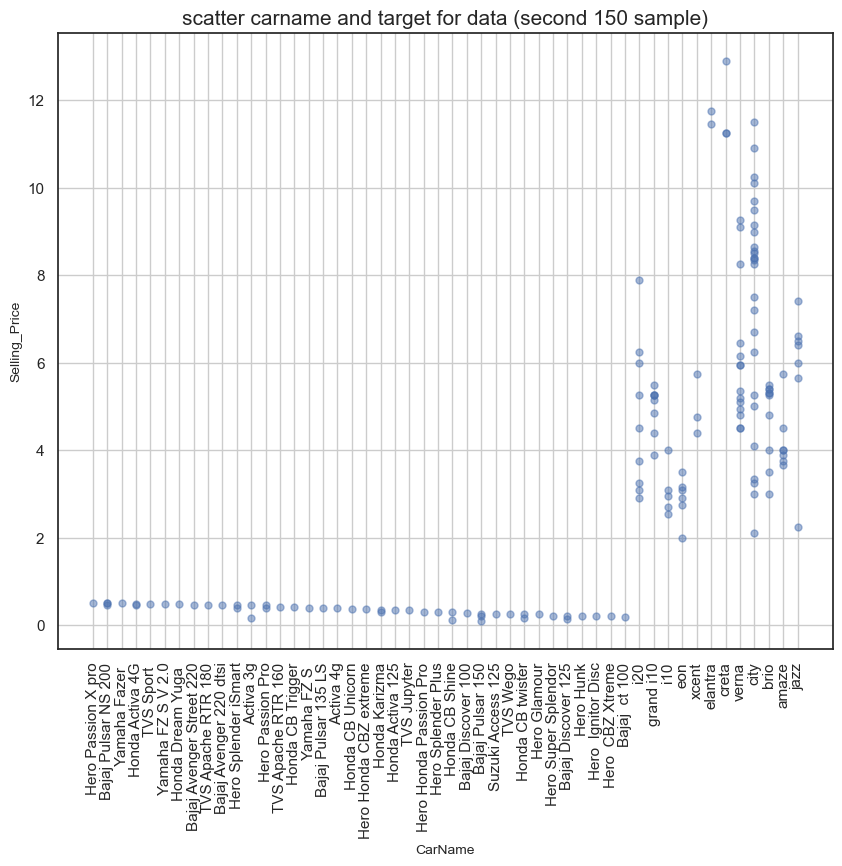

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(x12, target1, s=25, alpha=.5)
plt.title('scatter carname and target for data (second 150 sample)', fontsize=15)
plt.xlabel("CarName", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
target = df['Selling_Price']
x2 = df['Year']

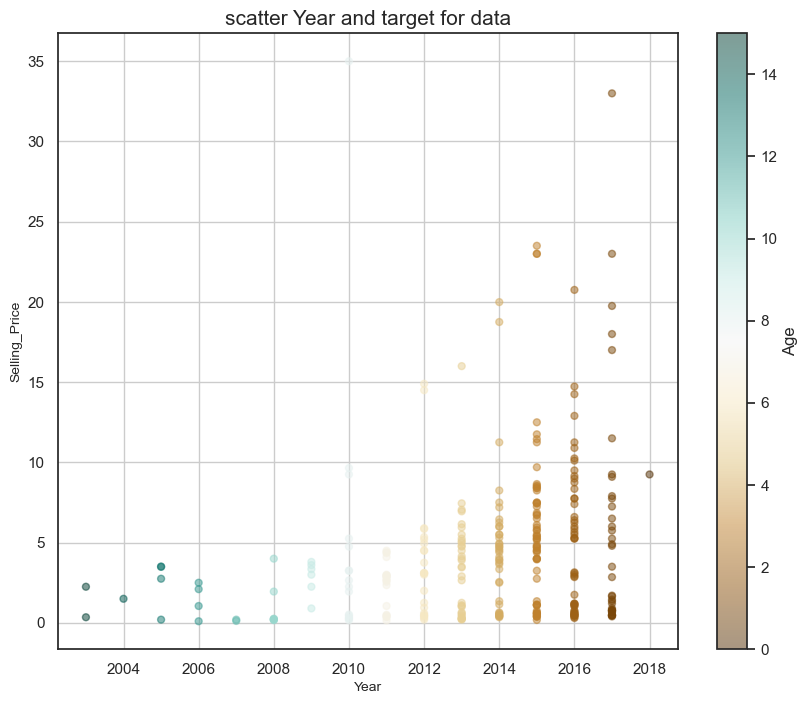

In [13]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'



plt.figure(figsize=(10,8))
plt.scatter(x2, target, s=25, alpha=.5, c=df.Age , cmap='BrBG' , plotnonfinite=True)
plt.title('scatter Year and target for data', fontsize=15)
plt.colorbar(label='Age')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

In [14]:
target = df['Selling_Price']
x3 = df['Present_Price']

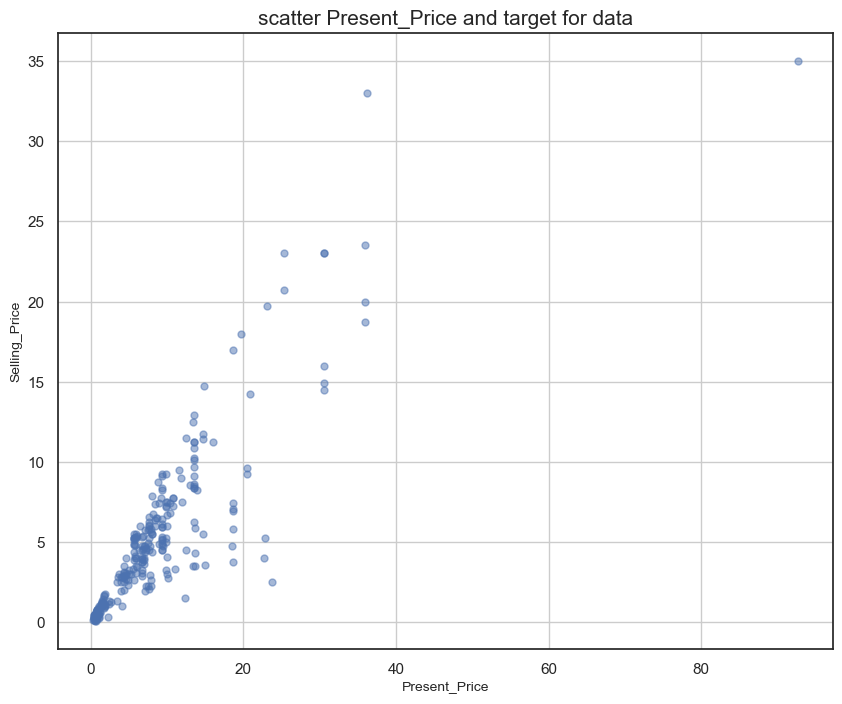

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x3, target, s=25, alpha=.5)
plt.title('scatter Present_Price and target for data', fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

In [16]:
target = df['Selling_Price']
x4 = df['Kms_Driven']

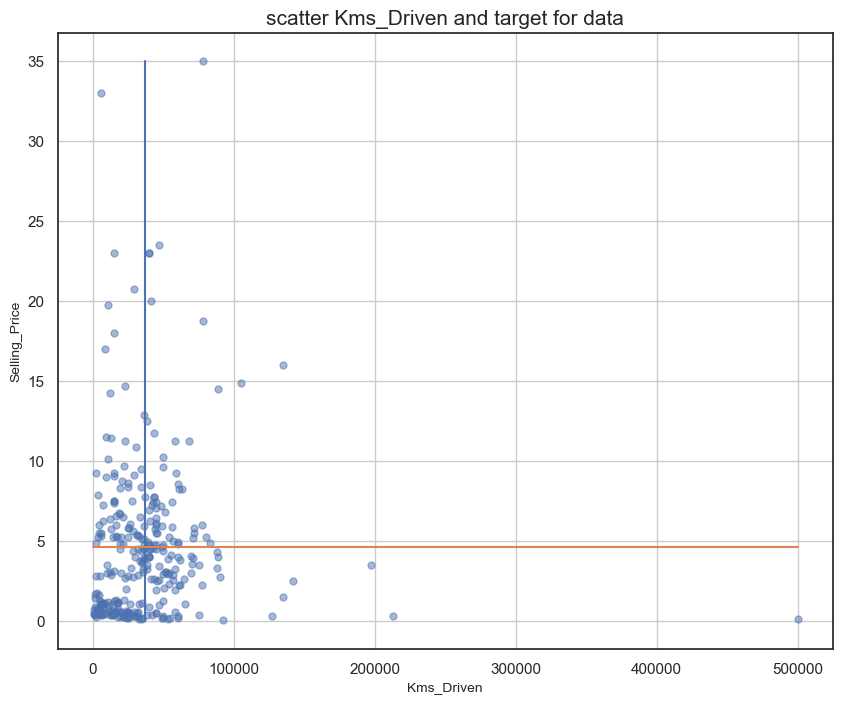

In [17]:
mean = np.mean (df['Kms_Driven'])
meany = np.mean (target)

plt.figure(figsize=(10,8))
plt.scatter(x4, target, s=25, alpha=.5)
plt.plot((mean , mean), (0, max(target)))
plt.plot((0, max(df['Kms_Driven'])), (meany, meany))
plt.title('scatter Kms_Driven and target for data', fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

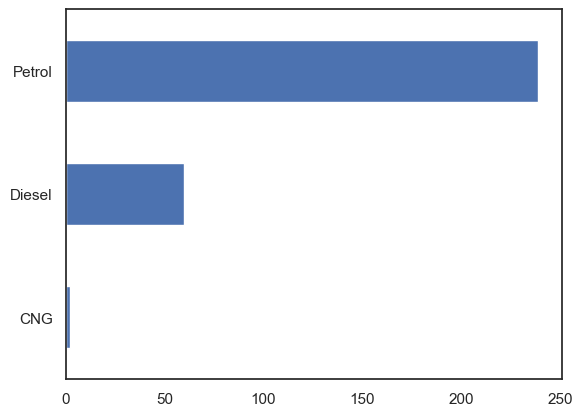

In [18]:
target = df['Selling_Price']
x5 = df['Fuel_Type']

df.Fuel_Type.value_counts().sort_values().plot(kind = 'barh')

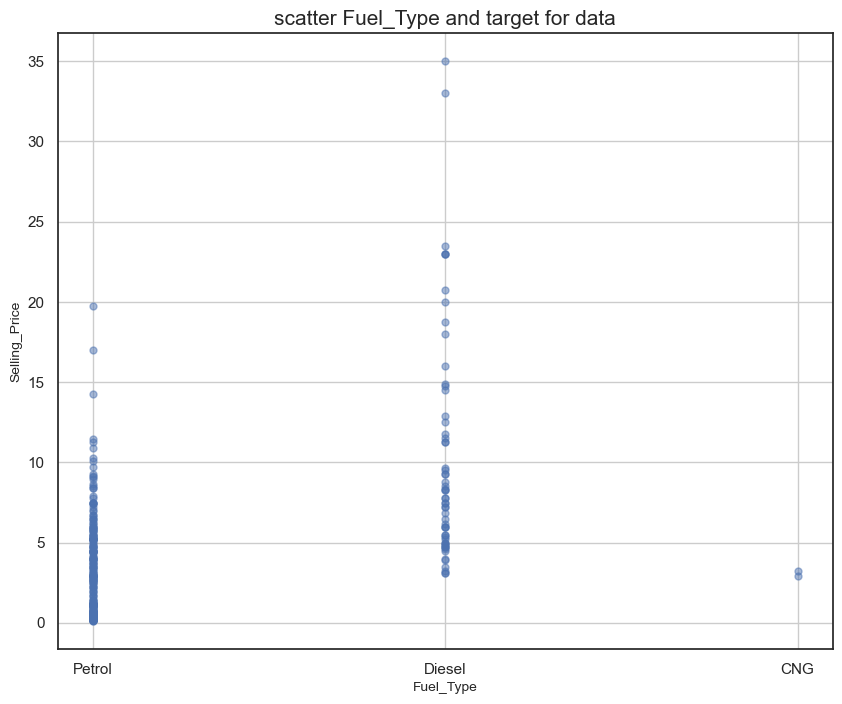

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x5, target, s=25, alpha=.5)
plt.title('scatter Fuel_Type and target for data', fontsize=15)
plt.xlabel("Fuel_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

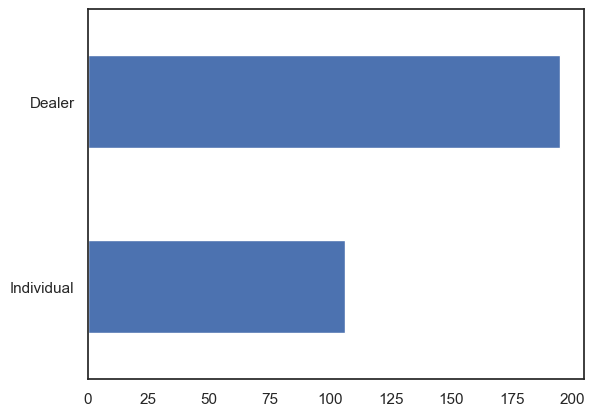

In [20]:
target = df['Selling_Price']
x6 = df['Seller_Type']

df.Seller_Type.value_counts().sort_values().plot(kind = 'barh')

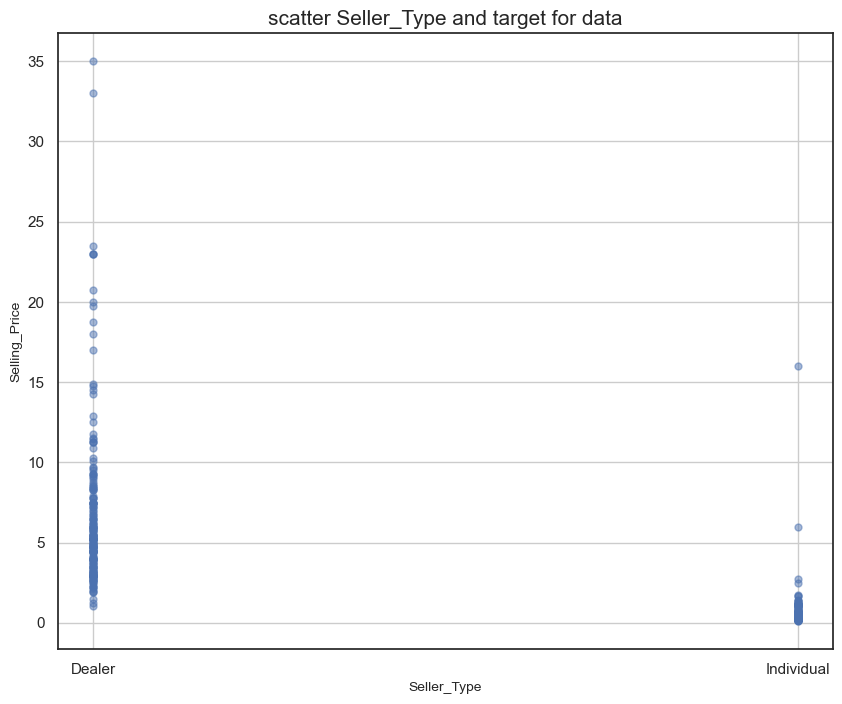

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(x6, target, s=25, alpha=.5)
plt.title('scatter Seller_Type and target for data', fontsize=15)
plt.xlabel("Seller_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

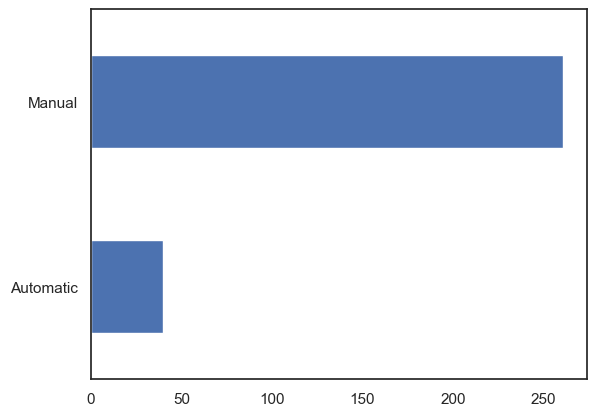

In [22]:
target = df['Selling_Price']
x7 = df['Transmission']

df.Transmission.value_counts().sort_values().plot(kind = 'barh')

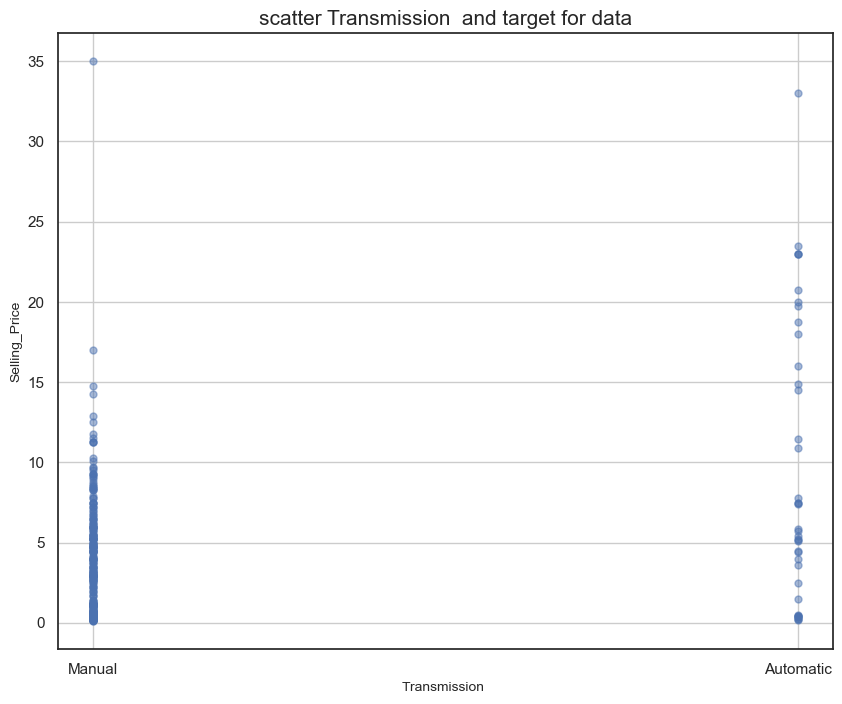

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(x7, target, s=25, alpha=.5)
plt.title('scatter Transmission  and target for data', fontsize=15)
plt.xlabel("Transmission ", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

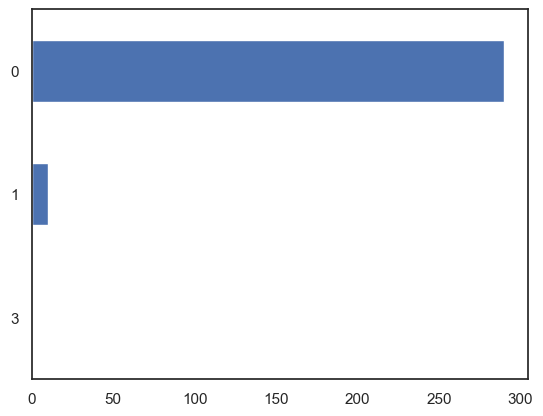

In [24]:
target = df['Selling_Price']
x8 = df['Owner']

df.Owner.value_counts().sort_values().plot(kind = 'barh')

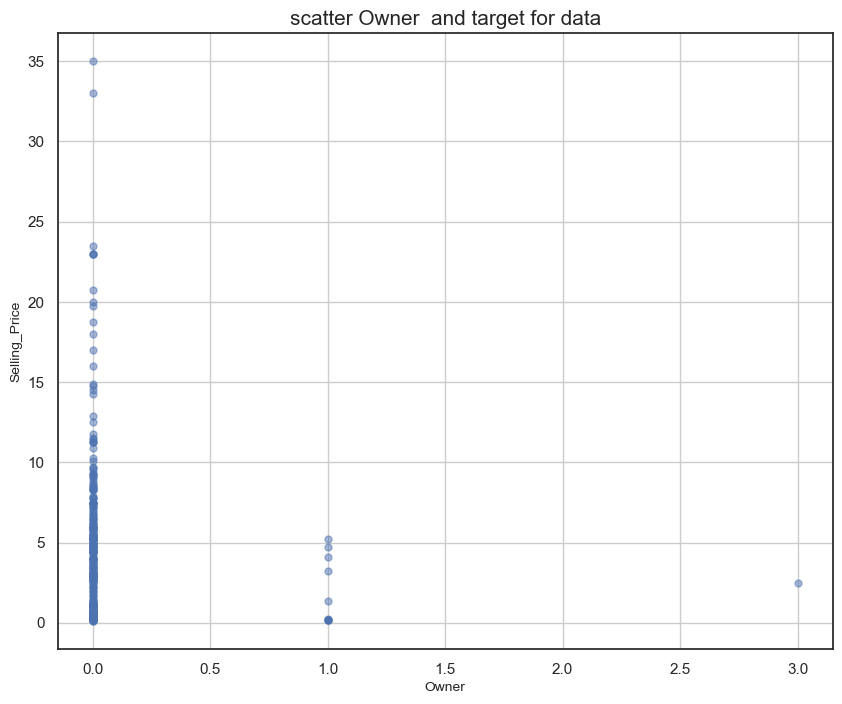

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(x8, target, s=25, alpha=.5)
plt.title('scatter Owner  and target for data', fontsize=15)
plt.xlabel("Owner", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

In [26]:
target = df['Selling_Price']
x9 = df['Age']

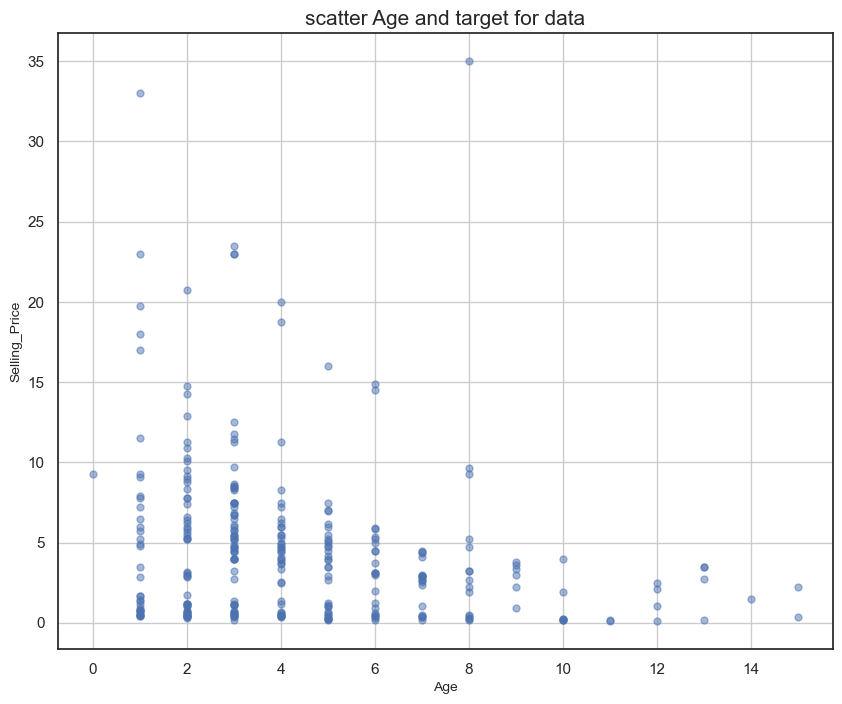

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(x9, target, s=25, alpha=.5)
plt.title('scatter Age and target for data', fontsize=15)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

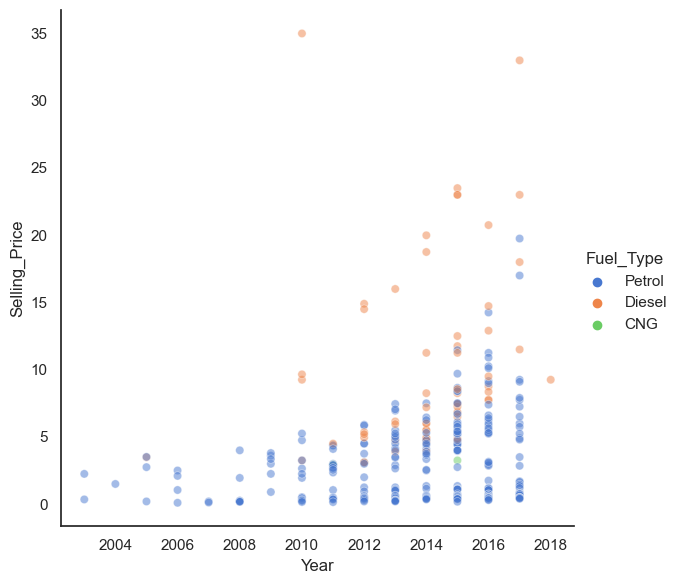

In [28]:
sns.relplot(x="Year", y="Selling_Price", hue="Fuel_Type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

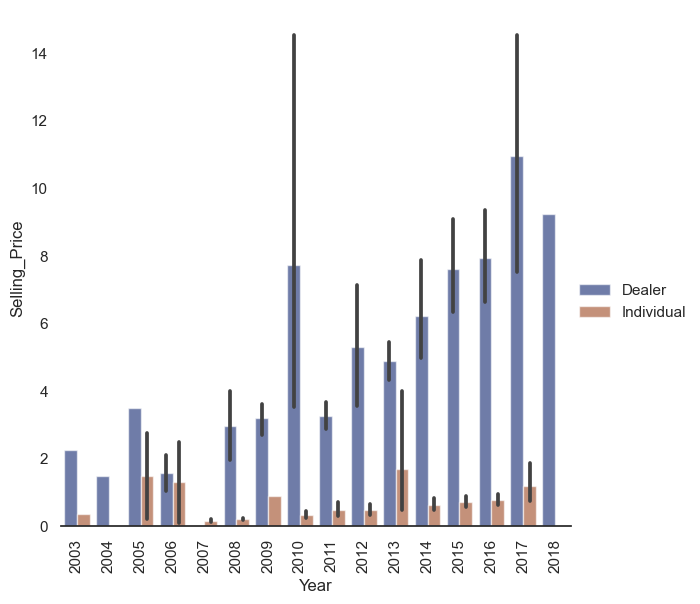

In [29]:
g = sns.catplot(
    data=df, kind="bar",
    x="Year", y="Selling_Price", hue="Seller_Type",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Year", "Selling_Price")
g.set_xticklabels(rotation=90)
g.legend.set_title("")

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

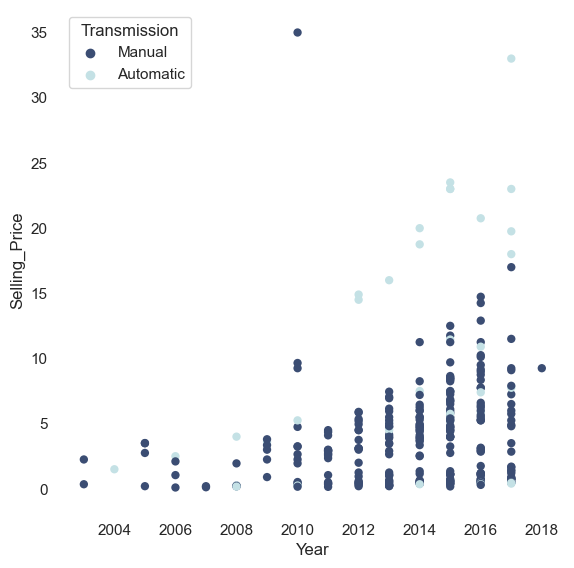

In [30]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Year", y="Selling_Price",
                hue="Transmission",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

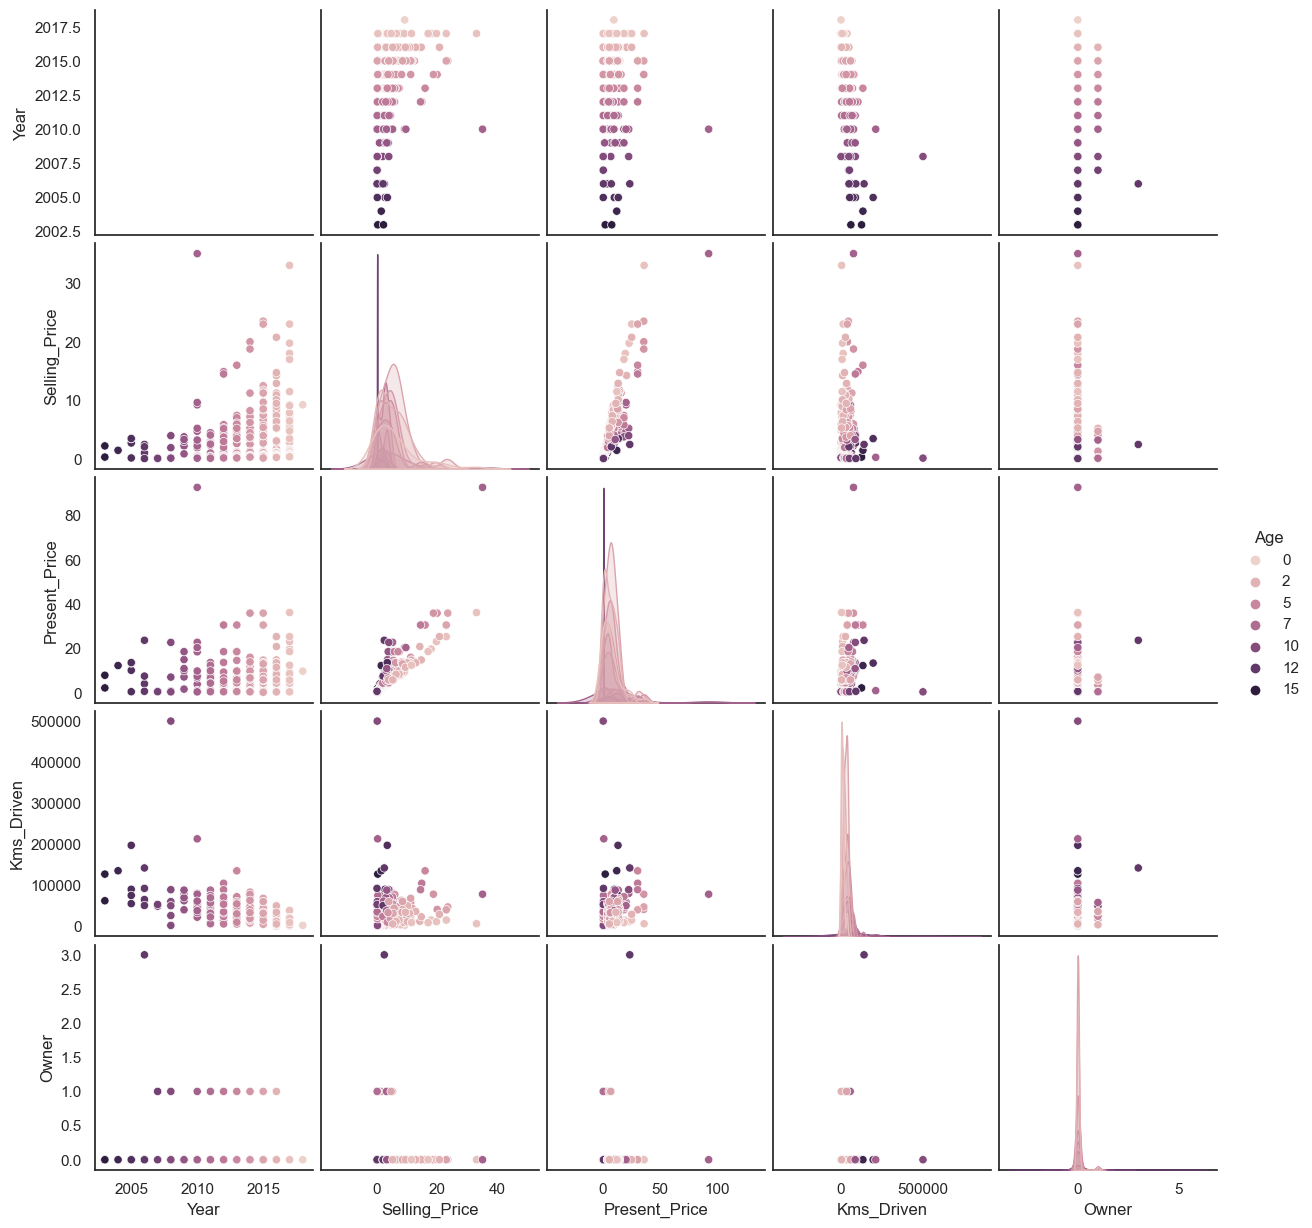

In [31]:
sns.pairplot(df, hue="Age")

In [32]:
df = df.drop(columns=['Car_Name'])
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,4
1,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,5
2,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,1
3,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,7
4,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,4
5,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,0
6,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,3
7,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,3
8,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,2
9,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,3


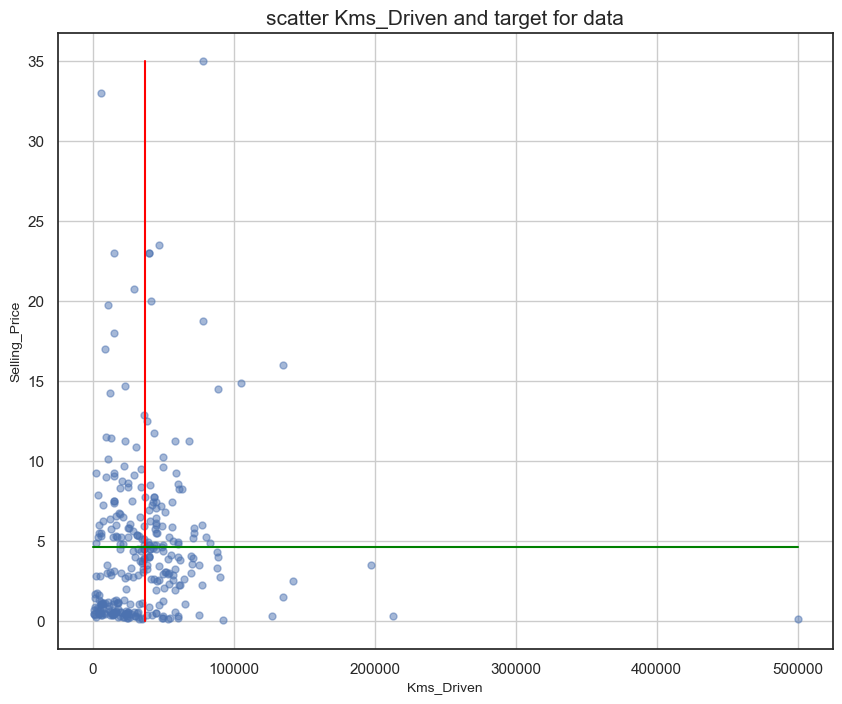

36947.20598006644
4.661295681063127


In [33]:
mean = np.mean (df['Kms_Driven'])
meany = np.mean (df['Selling_Price'])

plt.figure(figsize=(10,8))
plt.scatter(df['Kms_Driven'], df['Selling_Price'], s=25, alpha=.5)
plt.plot((mean , mean), (0, max(df['Selling_Price'])), 'red')
plt.plot((0, max(df['Kms_Driven'])), (meany, meany), 'green')
plt.title('scatter Kms_Driven and target for data', fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()
print(mean)
print(meany)

In [34]:
LE = LabelEncoder()

df_label = LE.fit_transform(df['Fuel_Type'])
df_label1 = LE.fit_transform(df['Seller_Type'])
df_label2 = LE.fit_transform(df['Transmission'])

df_label = pd.DataFrame(df_label, columns=['Fuel_Type_le'])
df_label1 = pd.DataFrame(df_label1, columns=['Seller_Type_le'])
df_label2 = pd.DataFrame(df_label2, columns=['Transmission_le'])

df_labelencoding = pd.concat([df, df_label, df_label1, df_label2], axis=1)
df_processing = df_labelencoding.drop(columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df_processing

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_le,Seller_Type_le,Transmission_le
0,2014,3.35,5.590,27000,0,4,2,0,1
1,2013,4.75,9.540,43000,0,5,1,0,1
2,2017,7.25,9.850,6900,0,1,2,0,1
3,2011,2.85,4.150,5200,0,7,2,0,1
4,2014,4.60,6.870,42450,0,4,1,0,1
5,2018,9.25,9.830,2071,0,0,1,0,1
6,2015,6.75,8.120,18796,0,3,2,0,1
7,2015,6.50,8.610,33429,0,3,1,0,1
8,2016,8.75,8.890,20273,0,2,1,0,1
9,2015,7.45,8.920,42367,0,3,1,0,1


In [35]:
corr_matrix = df_processing.corr()
corr_matrix['Transmission_le'].sort_values(ascending=False)

Transmission_le    1.000000
Fuel_Type_le       0.080466
Seller_Type_le     0.063240
Year               0.000394
Age               -0.000394
Owner             -0.050316
Kms_Driven        -0.162510
Present_Price     -0.348715
Selling_Price     -0.367128
Name: Transmission_le, dtype: float64

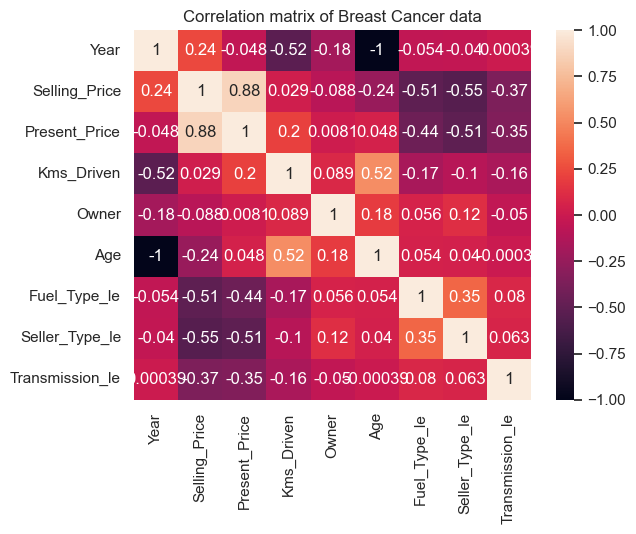

In [36]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix of Breast Cancer data")
plt.show()

In [37]:
target = df_processing['Selling_Price']
scale = MinMaxScaler(feature_range=(0, 1))
norm1 = scale.fit_transform(df_processing[['Year','Present_Price','Kms_Driven','Owner','Age', 'Fuel_Type_le', 'Seller_Type_le', 'Transmission_le']])
norm1 = pd.DataFrame(norm1, columns=['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Fuel_Type_le', 'Seller_Type_le', 'Transmission_le'])
df_final = pd.concat([norm1, target], axis=1)
df_final

,Year,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_le,Seller_Type_le,Transmission_le,Selling_Price
0,0.733333,0.057109,0.053053,0.000000,0.266667,1.0,0.0,1.0,3.35
1,0.666667,0.099913,0.085085,0.000000,0.333333,0.5,0.0,1.0,4.75
2,0.933333,0.103273,0.012813,0.000000,0.066667,1.0,0.0,1.0,7.25
3,0.533333,0.041504,0.009409,0.000000,0.466667,1.0,0.0,1.0,2.85
4,0.733333,0.070980,0.083984,0.000000,0.266667,0.5,0.0,1.0,4.60
5,1.000000,0.103056,0.003145,0.000000,0.000000,0.5,0.0,1.0,9.25
6,0.800000,0.084525,0.036629,0.000000,0.200000,1.0,0.0,1.0,6.75
7,0.800000,0.089835,0.065924,0.000000,0.200000,0.5,0.0,1.0,6.50
8,0.866667,0.092870,0.039586,0.000000,0.133333,0.5,0.0,1.0,8.75
9,0.800000,0.093195,0.083818,0.000000,0.200000,0.5,0.0,1.0,7.45


In [38]:
X_one = df_final['Present_Price'].values.reshape(-1, 1)
Y_one = df_final['Selling_Price'].values.reshape(-1, 1)

In [39]:
x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(X_one, Y_one, test_size=.2, random_state=0)

In [40]:
print(x_train_one.shape)
print(x_test_one.shape)
print(y_train_one.shape)
print(y_test_one.shape)

(240, 1)
(61, 1)
(240, 1)
(61, 1)


In [41]:
# def evaluation_kfold(X,Y):
#     mean_list = []
#     regressor_one = LinearRegression()
#     for fold in range (2, 11):
#         kfold_validation = KFold (fold)
#         result = cross_val_score (regressor_one, X, Y, cv=kfold_validation)* 100
#         mean = np.mean(result)
#         mean_list.append(mean)
#     return mean_list
# print(evaluation_kfold(X_one, Y_one))
# plt.plot(evaluation_kfold(X_one, Y_one))
# plt.show()

In [42]:
regressor_one = LinearRegression()

In [43]:
regressor_one.fit(x_train_one, y_train_one)

LinearRegression()

In [44]:
y_pred_one = regressor_one.predict(x_test_one)

In [45]:
y_pred_one

array([[ 5.40367775],
       [ 1.15777727],
       [ 3.57141372],
       [ 6.49313204],
       [10.53896909],
       [ 3.70511948],
       [ 4.1111888 ],
       [ 1.02110028],
       [ 4.1111888 ],
       [ 5.40367775],
       [ 3.02668658],
       [ 1.21918288],
       [ 3.57141372],
       [ 5.67108926],
       [ 6.09201478],
       [12.21276704],
       [ 4.95799191],
       [ 4.09633261],
       [ 1.26870353],
       [ 1.65001253],
       [ 4.71534073],
       [ 3.57141372],
       [ 5.40367775],
       [ 7.48354503],
       [ 1.12014158],
       [ 1.16471016],
       [ 1.13846422],
       [ 1.3429845 ],
       [ 1.23899114],
       [ 8.19664238],
       [ 4.1111888 ],
       [ 5.651281  ],
       [ 1.23899114],
       [ 5.15112244],
       [ 5.70080165],
       [ 1.49154645],
       [ 4.56182671],
       [ 4.63610769],
       [ 1.12014158],
       [ 7.68162762],
       [ 5.61661654],
       [18.55636223],
       [ 3.57141372],
       [ 4.27955901],
       [ 4.74010105],
       [ 7

In [46]:
print(metrics.mean_absolute_error(y_test_one, y_pred_one))
print(metrics.mean_squared_error(y_test_one, y_pred_one))
print(metrics.r2_score(y_test_one, y_pred_one))


1.553899315736052
5.244314257324024
0.7925288537728552


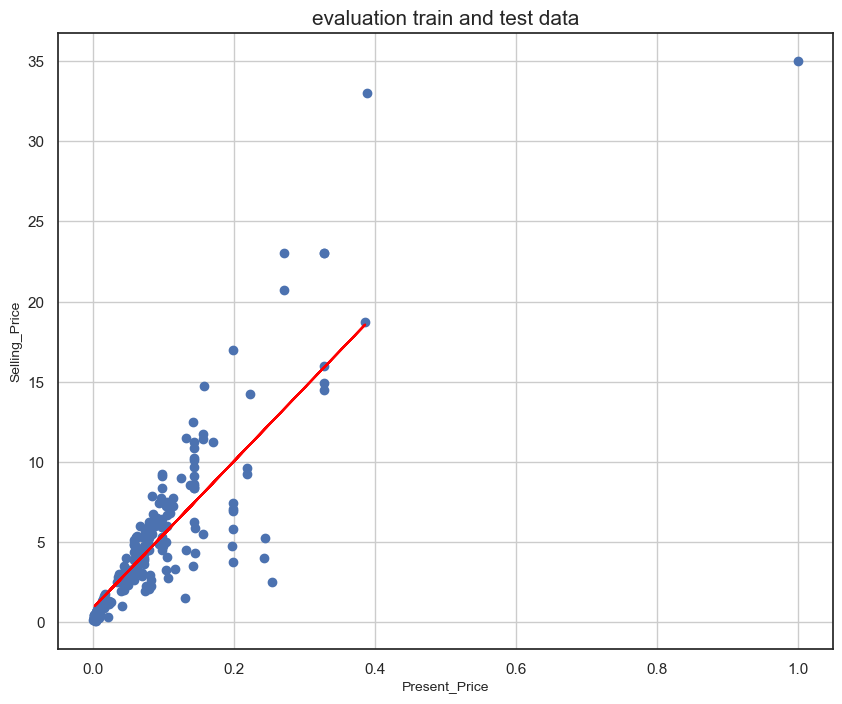

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(x_train_one, y_train_one)
plt.plot(x_test_one, y_pred_one, "red")
plt.title('evaluation train and test data', fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

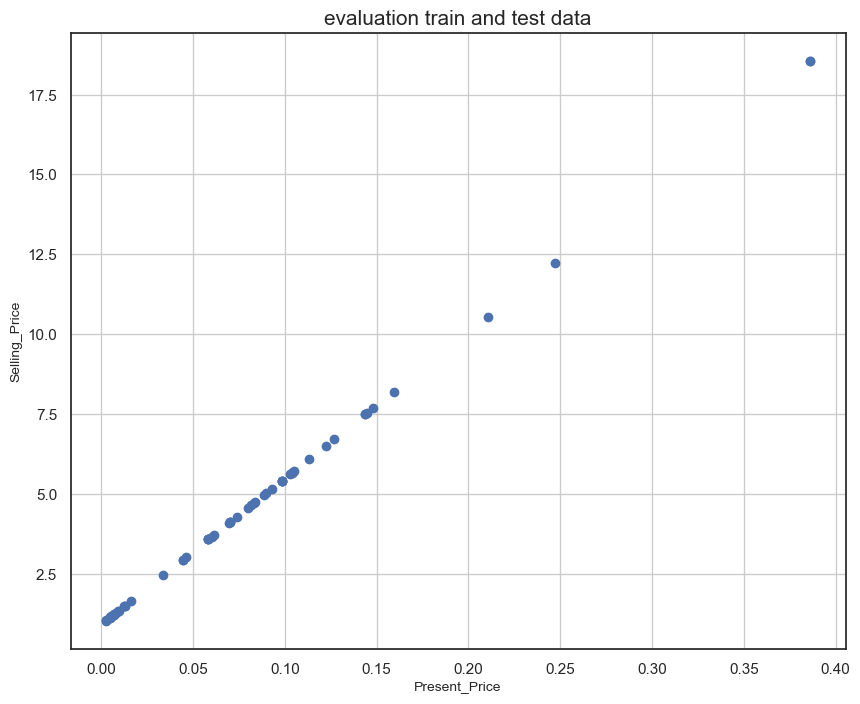

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_one, y_pred_one)
# plt.plot(x_test_one, y_pred_one, "red")
plt.title('evaluation train and test data', fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

[0.0862277201128977, 0.7925288537728552, -0.01920956472448765, -0.007778679789356202, 0.0862277201128967, 0.311503621868219, 0.3476097732755664, 0.25857447324983485]
[0.8873081285616661, 0.138472719270456, 0.0893397156505279, 0.08212548100344386, 0.36812948580487603, 0.43090611711558724, 0.3602040999585745]
[0.8874460463620485, 0.8796629477106496, 0.8880480349554589, 0.8970784918883662, 0.8953298255854907, 0.8950809849552376]
[0.8798629933907769, 0.8883281868599395, 0.8983462300678213, 0.8956801801891139, 0.895383226892941]
[0.8820983538068954, 0.8939694867142669, 0.8913485669434871, 0.8856935772964767]
[0.895512777077779, 0.8932160287147254, 0.8879226026928654]
[0.9030709219046664, 0.9077164481818055]


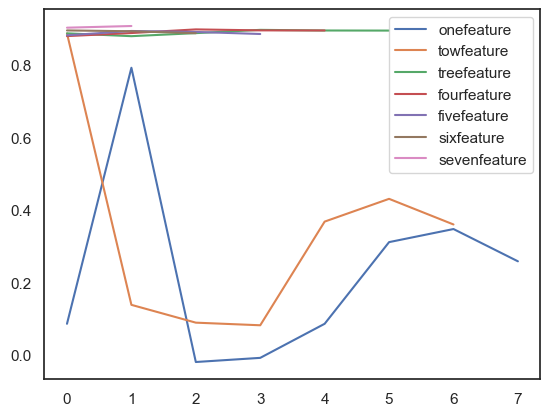

In [65]:
def test_onefeature(df):
    feature_list = []
    for feature in range(0, 8):
        X = df[df.columns[feature]].values.reshape(-1, 1)
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature_list.append(R2_score)
    print(feature_list)
    return feature_list
    

def test_twofeature(df):
    feature2_list = []
    for feature in range(1, 8):
        X = df[[df.columns[0], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature2_list.append(R2_score)
    print(feature2_list)
    return feature2_list


def test_treefeature(df):
    feature3_list = []
    for feature in range(2, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature3_list.append(R2_score)
    print(feature3_list)
    return feature3_list


def test_fourfeature(df):
    feature4_list = []
    for feature in range(3, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature4_list.append(R2_score)
    print(feature4_list)
    return feature4_list


def test_fivefeature(df):
    feature5_list = []
    for feature in range(4, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature5_list.append(R2_score)
    print(feature5_list)
    return feature5_list


def test_sixfeature(df):
    feature6_list = []
    for feature in range(5, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature6_list.append(R2_score)
    print(feature6_list)
    return feature6_list



def test_sevenfeature(df):
    feature7_list = []
    for feature in range(6, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature7_list.append(R2_score)
    print(feature7_list)
    return feature7_list


plt.plot(test_onefeature(df_final), label='onefeature')
plt.plot(test_twofeature(df_final), label='towfeature')
plt.plot(test_treefeature(df_final), label='treefeature')
plt.plot(test_fourfeature(df_final), label='fourfeature')
plt.plot(test_fivefeature(df_final), label='fivefeature')
plt.plot(test_sixfeature(df_final), label='sixfeature')
plt.plot(test_sevenfeature(df_final), label='sevenfeature')
plt.legend()
plt.show()

[0.8750999759868081, 0.9157931709710477, 0.8520644353590114, 0.8427768198929548, 0.8399903712385823]


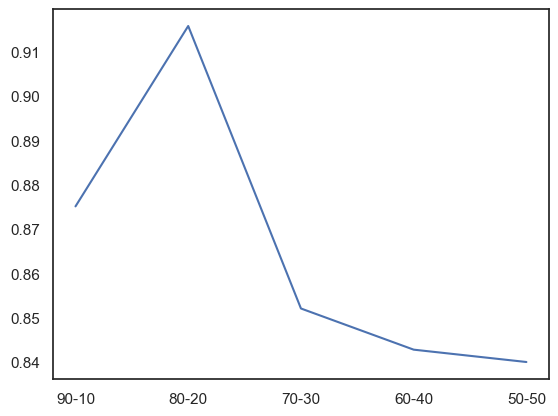

In [69]:
def test_size(df):
    test_list = []
    X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
    Y = df.iloc[:, 8].values.reshape(-1, 1)
    for test in range(1, 6):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(test/10), random_state=0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)
        test_list.append(R2_score)
    print(test_list)
    return test_list


def kfold_valedation(df):
    kfold_list = []
    X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
    Y = df.iloc[:, 8].values.reshape(-1, 1)
    for k in range (2, 11):
        regressor = LinearRegression()
        kfold_validation = KFold (k)
        result = cross_val_score(regressor, X, Y , cv=kfold_validation)
        mean = np.mean(result)
        kfold_list.append(mean)
    return kfold_list

# plt.plot(kfold_valedation(df_final))
# plt.show()

plt.plot(test_size(df_final))
plt.xticks(range(0, 5), ['90-10', '80-20', '70-30', '60-40', '50-50'])
plt.show()

In [88]:
X = df_final[[df_final.columns[0], df_final.columns[1], df_final.columns[2], df_final.columns[3], df_final.columns[4], df_final.columns[5], df_final.columns[6], df_final.columns[7]]]
Y = df_final.iloc[:, 8].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
R2_score = metrics.r2_score(y_test, y_pred)
R2_score

0.9157931709710477

In [90]:
print (regressor.intercept_)
print(regressor.coef_)

[-2.85608912e+13]
[[ 2.85608912e+13  4.01365370e+01 -2.87998006e+00 -2.71026680e+00
   2.85608912e+13 -3.05693389e+00 -1.13176046e+00 -1.36285803e+00]]


In [80]:
present_Price = float(input("please enter present price : "))
KMS_Driven = float(input("please enter KMS Driven : "))
Fuel_Type = float(input("please enter Fuel Type : "))
Seller_type = float(input("please enter Seller type : "))
Transmission = float(input("please enter Transmission : "))
Owner = float(input("please enter Owner : "))
Age = float(input("please enter Age : "))

y = regressor.intercept_ + (regressor.coef_[0][0] * present_Price) +  (regressor.coef_[0][1] * KMS_Driven) + (regressor.coef_[0][2] * Seller_type) + (regressor.coef_[0][3] * Transmission) + (regressor.coef_[0][4] * Owner) + (regressor.coef_[0][5] * Age)   

please enter present price : 5
please enter KMS Driven : 5
please enter Fuel Type : 5
please enter Seller type : 5
please enter Transmission : 5
please enter Owner : 5
please enter Age : 5


IndexError: index 1 is out of bounds for axis 0 with size 1